Load the dataset


In [1]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

# Load California housing dataset
california_housing = fetch_california_housing()

# Create a DataFrame
df = pd.DataFrame(data=california_housing.data, columns=california_housing.feature_names)

# Add the target variable 'price'
df['price'] = california_housing.target

# Display the first few rows of the dataset
print(df.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  price  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  


Data Exploration

In [2]:
# Display information about the dataset
print(df.info())

# Display summary statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
2

Data Visualization

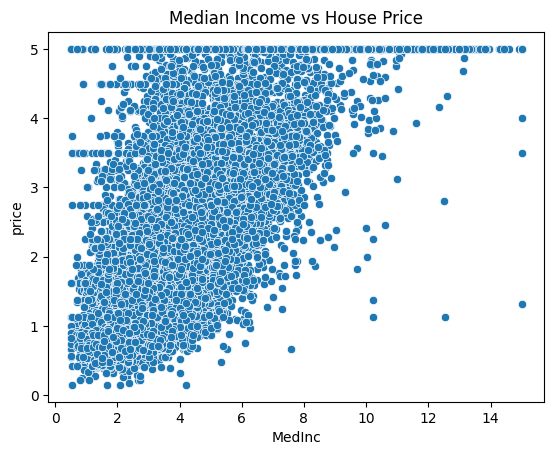

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot: Relationship between a feature (e.g., 'MedInc') and the target variable
sns.scatterplot(x='MedInc', y='price', data=df)
plt.title('Median Income vs House Price')
plt.show()

Data Preprocessing



In [4]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Handling missing values (if any)
imputer = SimpleImputer(strategy='median')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Scaling numerical features
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_imputed), columns=df.columns)

Splitting the Dataset

In [5]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = df_scaled.drop('price', axis=1)
y = df_scaled['price']

# Split the data into training and testing sets (e.g., 80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Choosing a Model

In [6]:
from sklearn.linear_model import LinearRegression

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

LinearRegression()

Model Evaluation

In [7]:
from sklearn.metrics import mean_squared_error

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.41747698052494986


Visualization

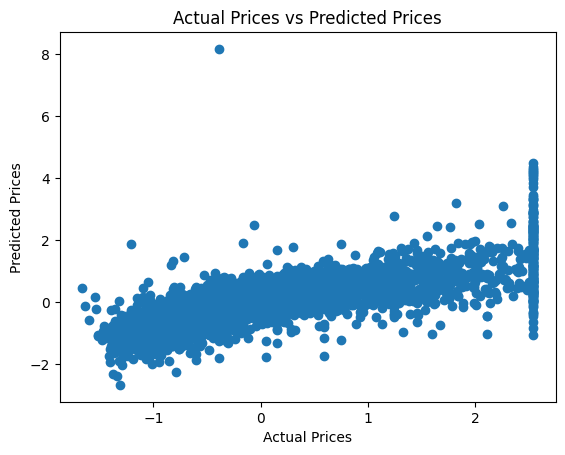

In [8]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

Hyperparameter Tuning

In [9]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters to tune
param_grid = {'fit_intercept': [True, False]}

# Create a linear regression model
model = LinearRegression()

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print(f'Best Hyperparameters: {best_params}')

# Train the model with the best hyperparameters
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

Best Hyperparameters: {'fit_intercept': False}


LinearRegression(fit_intercept=False)

Feature Importance

In [10]:
# Get feature coefficients
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': best_model.coef_})
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)
print(coefficients)

      Feature  Coefficient
0      MedInc     0.738676
3   AveBedrms     0.321626
1    HouseAge     0.106059
4  Population    -0.001992
5    AveOccup    -0.031739
2    AveRooms    -0.264416
7   Longitude    -0.753011
6    Latitude    -0.777026
